In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
df.shape

(10000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [5]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Billing Amount,10000.0,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room Number,10000.0,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000


In [7]:
df.describe(include = 'O')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2022-04-27,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Date of Admission and Discharge Date both are in object dtype we need to change it to datetime

In [10]:
for Date in ["Date of Admission", "Discharge Date"]:
    df[Date] = pd.to_datetime(df[Date])

df["Days_of_Hospitalisation"] = (
    df["Discharge Date"] - df["Date of Admission"]
).dt.days

df["Days_of_Hospitalisation"] = df["Days_of_Hospitalisation"].astype(int)

df["Days_of_Hospitalisation"]


0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Days_of_Hospitalisation, Length: 10000, dtype: int64

In [11]:
# Drop the columns which are not necessary for the Analysis

df = df.drop(columns = ["Date of Admission" , "Discharge Date" , "Name" , "Room Number"])     

In [12]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days_of_Hospitalisation'],
      dtype='object')

In [13]:
#using for loop to find the distribution of data for categorical columns
for col in df.columns:
    if df[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(df[col].value_counts())
        print('--')

Gender
Female    5075
Male      4925
Name: count, dtype: int64
--
Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64
--
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64
--
Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64
--
Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64
--
Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64
--
Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64
--


# Data Exploration and Visualisation

In [14]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]

print("No. of Numeric features:", len(numeric_features))
numeric_features

No. of Numeric features: 3


['Age', 'Billing Amount', 'Days_of_Hospitalisation']

In [15]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print("No. of Categorical features:", len(categorical_features))
categorical_features

No. of Categorical features: 9


['Gender',
 'Blood Type',
 'Medical Condition',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

In [16]:
discrete_features = [
    feature for feature in numeric_features 
    if df[feature].nunique() < 0.2 * df.shape[0]
]

continuous_features = [
    feature for feature in numeric_features 
    if df[feature].nunique() >= 0.2 * df.shape[0]
]

print("Discrete Features:", discrete_features)
print("Continuous Features:", continuous_features)


Discrete Features: ['Age', 'Days_of_Hospitalisation']
Continuous Features: ['Billing Amount']


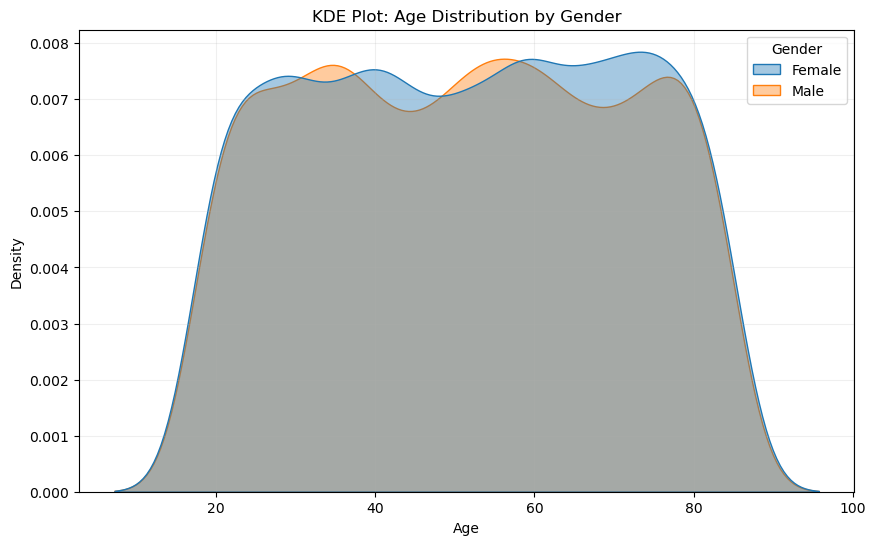

In [17]:
# KDE Plot: Age distribution for each Gender
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Age", hue="Gender", fill=True, alpha=0.4)

plt.title("KDE Plot: Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True, alpha=0.2)

plt.show()


## Insights

1 **The age pattern is uniform.**


2 **The Gender pattern is Uniform**


3 **No specific Relation between age and gender.**


4 **0-18 and 85+ groups have lighter contribution.**

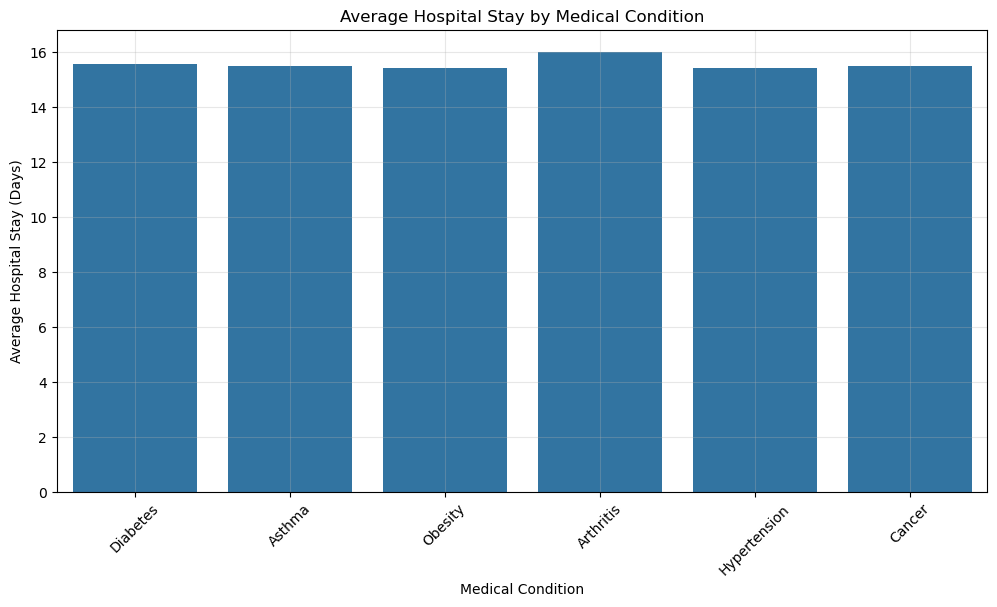

In [18]:
# Days of Hospitalisation vs Medical condition can help in advance emergency preparations.

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Medical Condition", y="Days_of_Hospitalisation", estimator='mean', errorbar=None)

plt.title("Average Hospital Stay by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Hospital Stay (Days)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

## Insight

### Arthiritis is the Highest in Hospitalisation days.

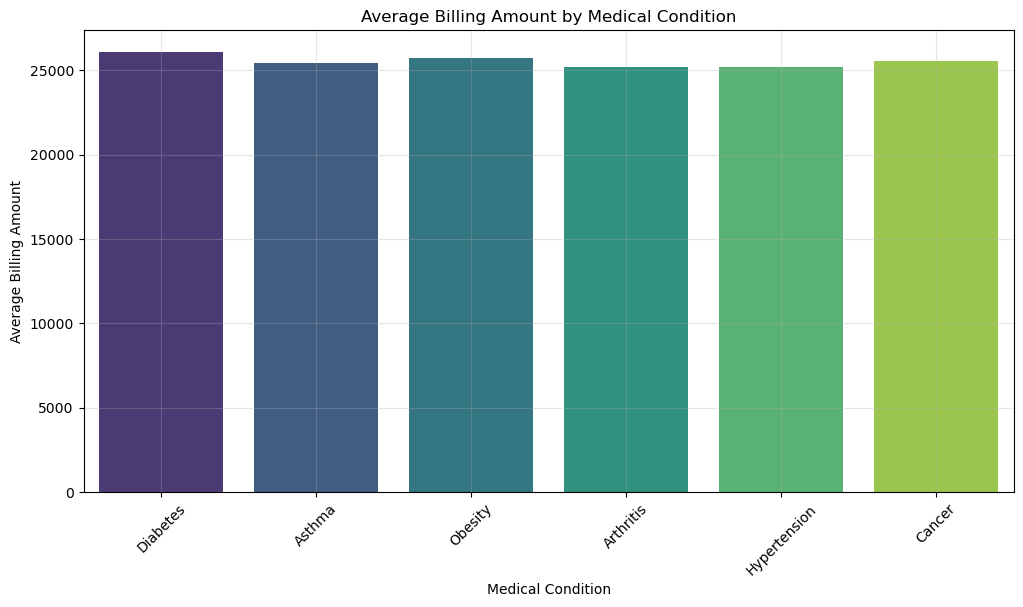

In [19]:
# Billing Amount vs Medical Condition to look which Medical condition cost the most

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=df, 
    x="Medical Condition", 
    y="Billing Amount",
    estimator='mean',
    errorbar=None,
    palette="viridis"
)

plt.title("Average Billing Amount by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.show()


## Insights

### Avg cost for all Medical condtions are alomost in same range between 250000-26000

### Diabetes and cancer have Highest cost.

### Asthama and Arthritis have lowest cost.

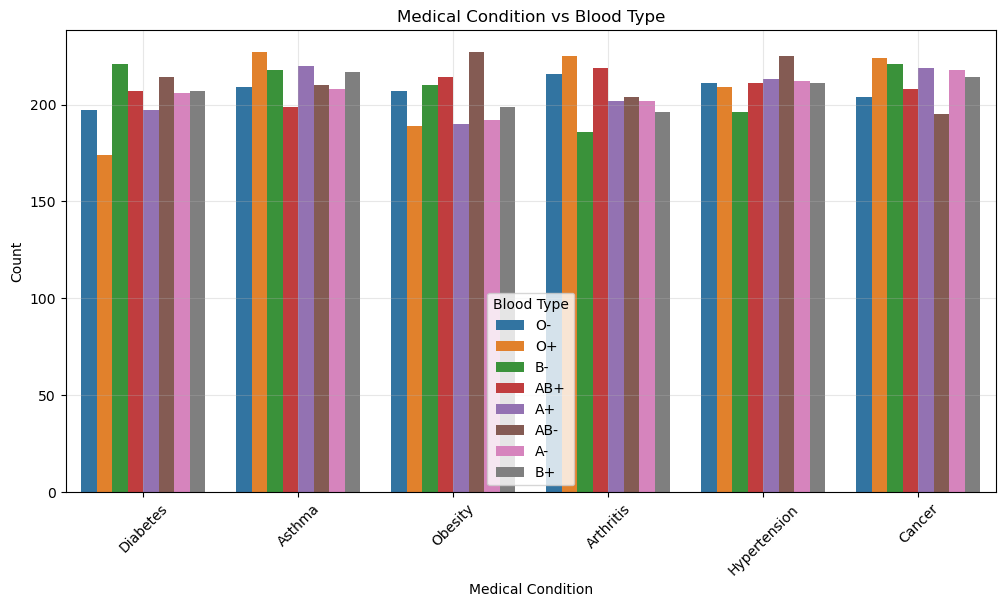

In [20]:
#Medical condition vs Blood Type

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Medical Condition", hue="Blood Type")

plt.title("Medical Condition vs Blood Type")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Blood Type")
plt.grid(alpha=0.3)
plt.show()

## Insights

### Most common blood types across all diseases: O+, B+, and A+

### Dataset shows a balanced representation of blood types across the patient population

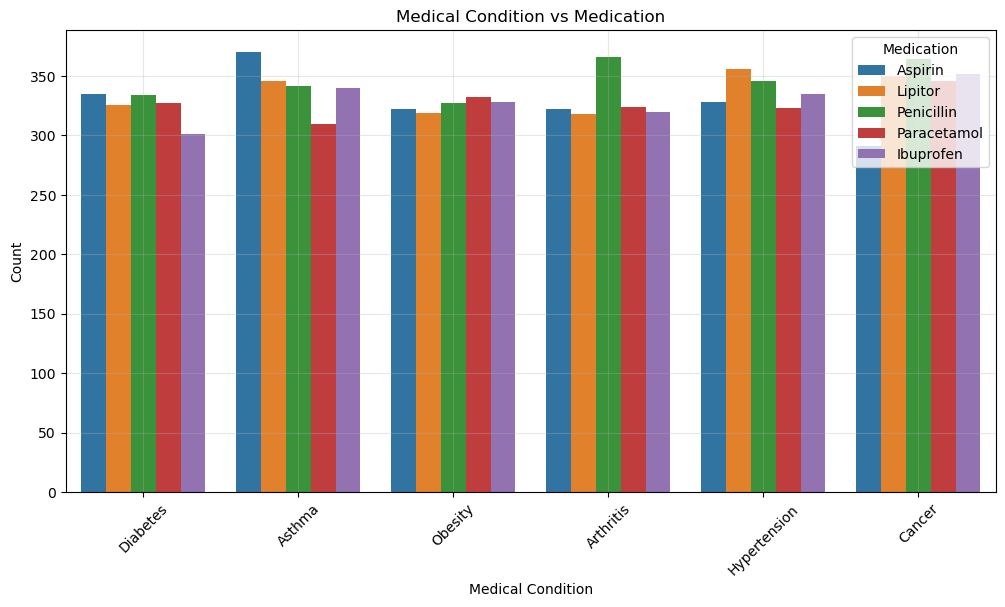

In [21]:
# Medical Condition vs Medication

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Medical Condition", hue="Medication")

plt.title("Medical Condition vs Medication")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Medication")
plt.grid(alpha=0.3)
plt.show()

## Insights
### Penicillin is consistently one of the most frequently prescribed medications.

### Aspirin and Lipitor show strong usage across chronic diseases.

### Ibuprofen usage is stable but slightly lower for Diabetes.

### Paracetamol usage is relatively stable but slightly lower in Asthma.

### Asthma shows the highest overall medication usage

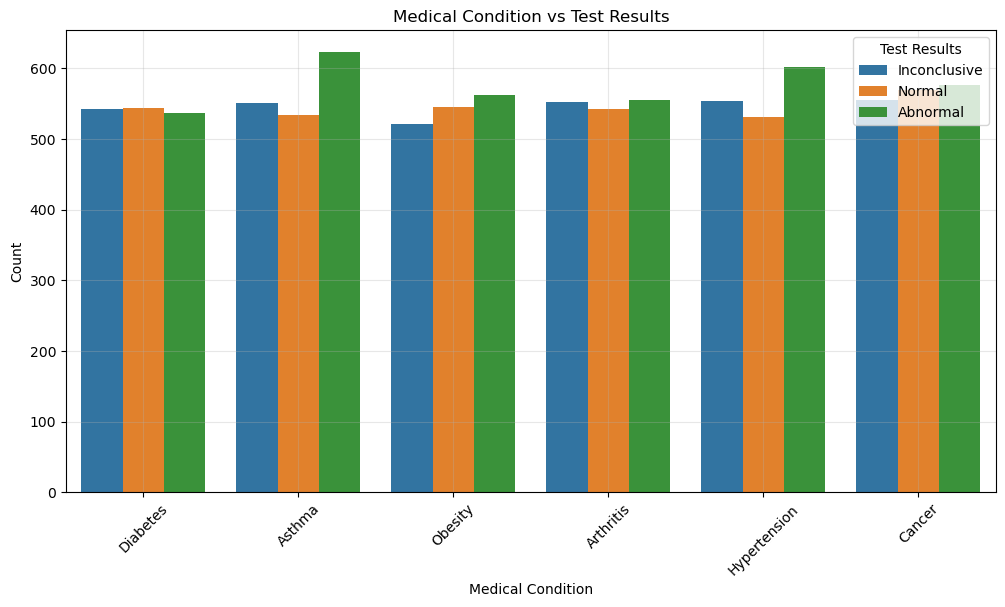

In [22]:
# Medical Condition vs Test Results

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Medical Condition", hue="Test Results")

plt.title("Medical Condition vs Test Results")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Test Results")
plt.grid(alpha=0.3)
plt.show()

## Insights

### Abnormal test results dominate across all medical conditions

### Asthma shows the highest number of abnormal result

### Obesity and Hypertension also show strong abnormal test frequencies

### No single medical condition shows unusually high normal results

<Figure size 1400x700 with 0 Axes>

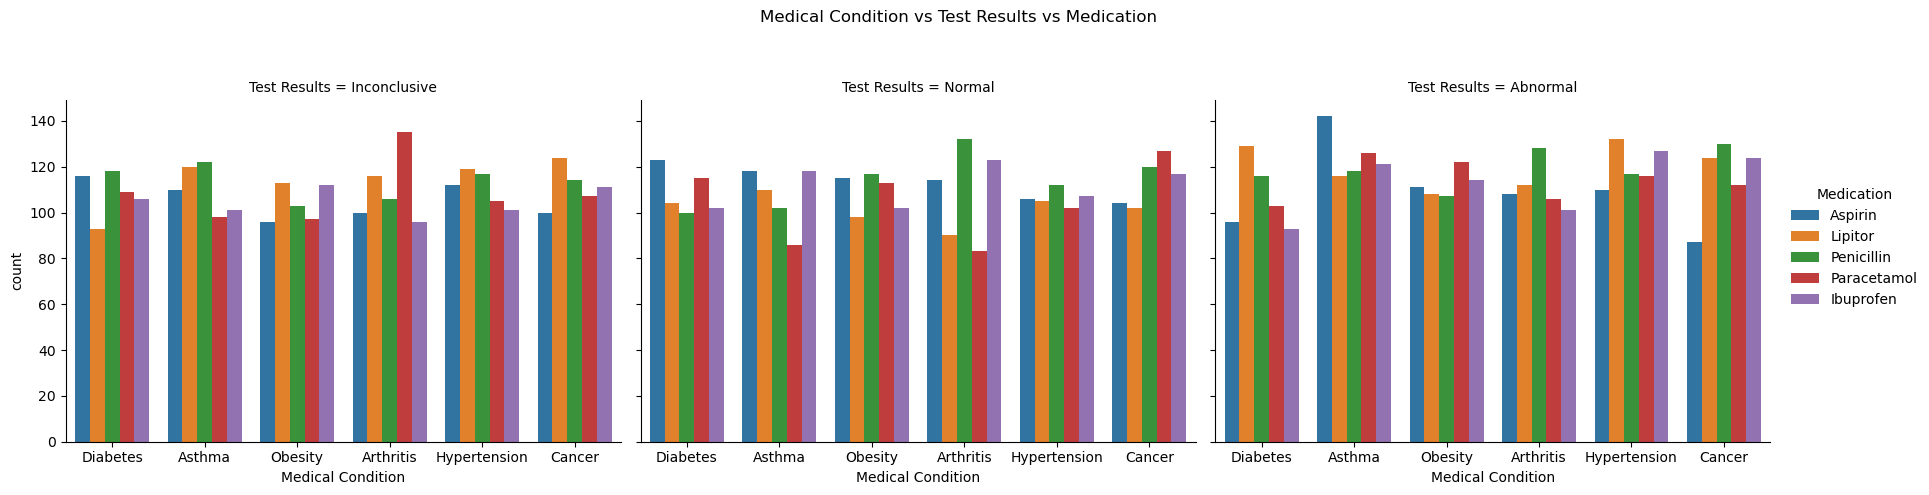

In [23]:
plt.figure(figsize=(14,7))
sns.catplot(
    data=df,
    x="Medical Condition",
    hue="Medication",
    col="Test Results",
    kind="count",
    height=5,
    aspect=1.2
)

plt.subplots_adjust(top=0.8)
plt.suptitle("Medical Condition vs Test Results vs Medication")
plt.show()


## Insights
### Aspirin spikes for Asthma with abnormal results

### Lipitor and Penicillin dominate in Abnormal test cases

### Abnormal results lead to highest overall medication counts

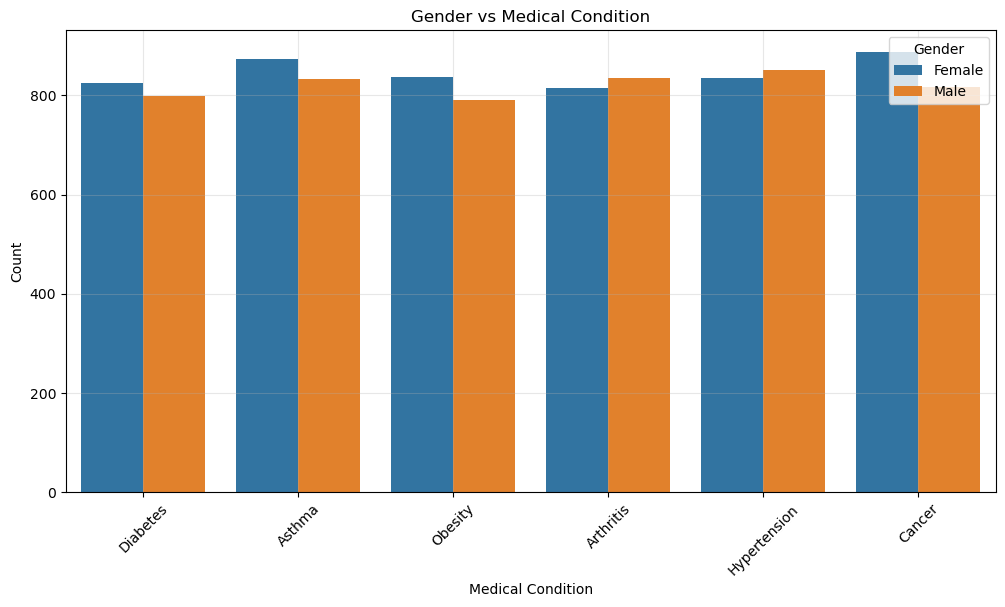

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Medical Condition", hue="Gender")

plt.title("Gender vs Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(alpha=0.3)
plt.show()

## Insights
### Females have high contribution in cancer and Asthama.

### Except Arthritis and Hypertension Female have high contribution in all other Medical conditions.

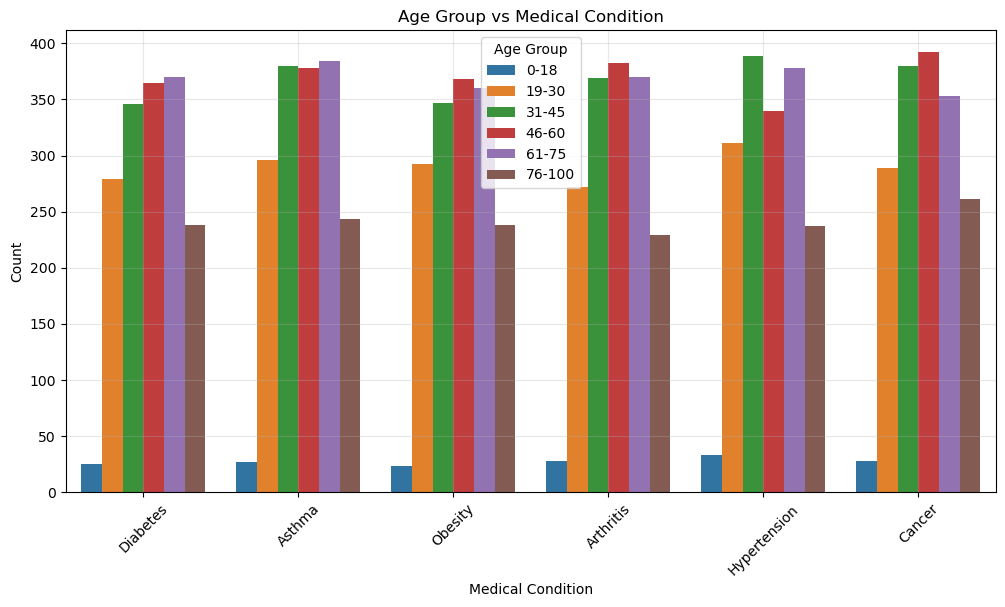

In [25]:
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 18, 30, 45, 60, 75, 100],
    labels=['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']
)

# Countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Medical Condition", hue="Age_Group")

plt.title("Age Group vs Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.grid(alpha=0.3)

plt.show()


## Insights
### Age Group 19–30
### Asthma and Hypertension appear slightly higher.
### Cancer and Arthritis remain low.


### Age Group 31–45 (Early Middle Age)
### A strong rise in all medical conditions.
### Conditions like:Diabetes , Obesity , Hypertension start becoming more common.


### One of the highest-risk groups across almost all diseases.
### Particularly strong counts for:Hypertension , Diabetes , Arthritis , Cancer
### This age range is often when chronic diseases start to intensif


### Age Group 61–75 (Senior Adults)
### The peak age bracket for most medical conditions.
### Highest counts appear here, especially for:Diabetes , Hypertension , Cancer , Arthritis
### This reflects the natural age-related rise in chronic diseases.

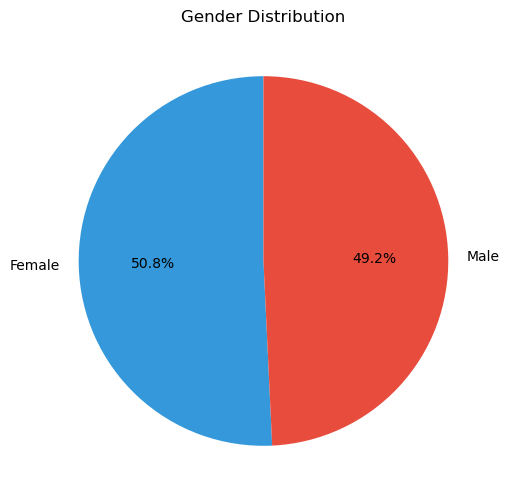

In [26]:
# Calculate counts of each gender
gender_counts = df['Gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%',  # Show percentage with one decimal
    colors=['#3498db', '#e74c3c'],  # Blue for male, red for female (or choose your colors)
    startangle=90
)

plt.title("Gender Distribution")
plt.show()

## Insight 

### Female have slightly Higher contribution in dataset.

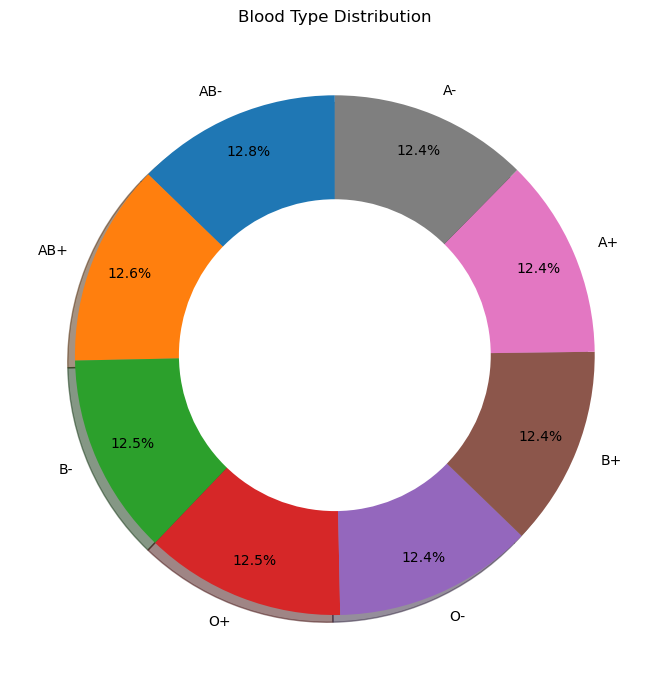

In [27]:
# Count each blood type
blood_counts = df['Blood Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    blood_counts,
    labels=blood_counts.index,
    autopct='%1.1f%%',     # percentage format
    startangle=90,
    shadow=True,           # optional visual enhancement
    pctdistance=0.85       # adjust percentage position
)

# Add center circle for donut effect (optional but looks premium)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Blood Type Distribution")
plt.tight_layout()
plt.show()


## Blood Group distribution is constant

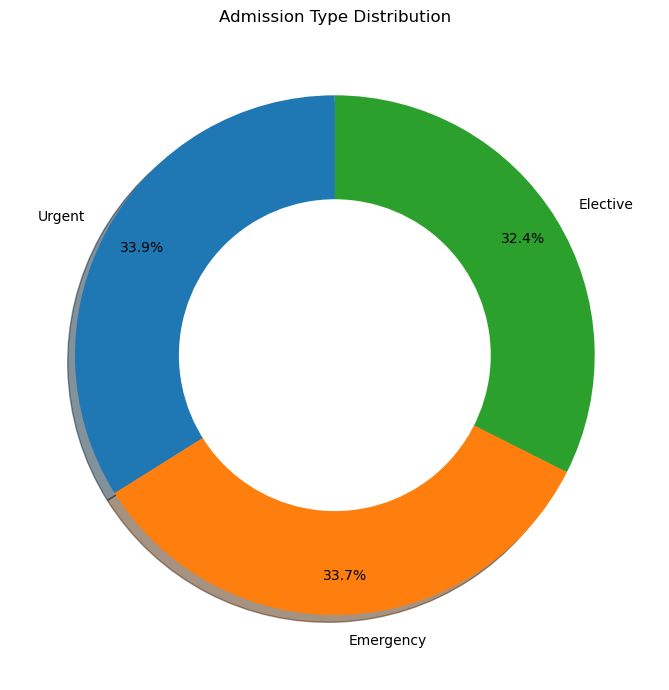

In [28]:
# Count admission type categories
admission_counts = df['Admission Type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    admission_counts,
    labels=admission_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.85
)

# Donut effect (premium look)
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Admission Type Distribution")
plt.tight_layout()
plt.show()

In [29]:
gender_medical = df.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,815,835
Asthma,874,834
Cancer,887,816
Diabetes,825,798
Hypertension,836,852
Obesity,838,790


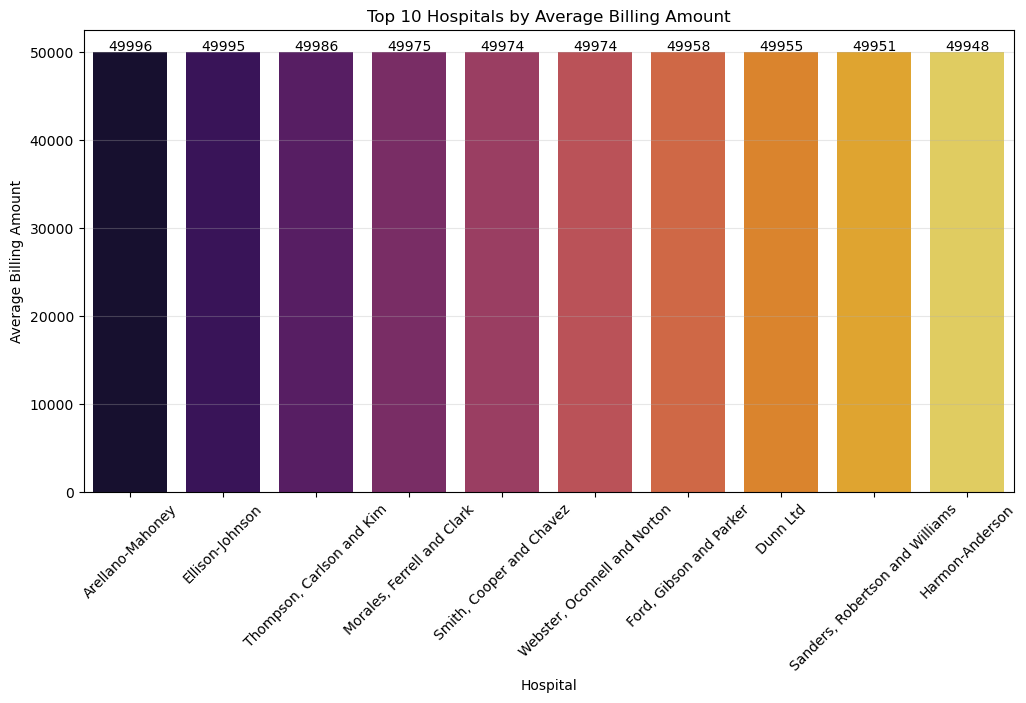

In [30]:
# Calculate average billing per hospital and select top 10
top10_hospitals = (
    df.groupby("Hospital")["Billing Amount"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top10_hospitals.index,
    y=top10_hospitals.values,
    palette="inferno"
)

plt.title("Top 10 Hospitals by Average Billing Amount")
plt.xlabel("Hospital")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Annotate bar values
for index, value in enumerate(top10_hospitals.values):
    plt.text(index, value + 200, f"{value:.0f}", ha='center')

plt.show()


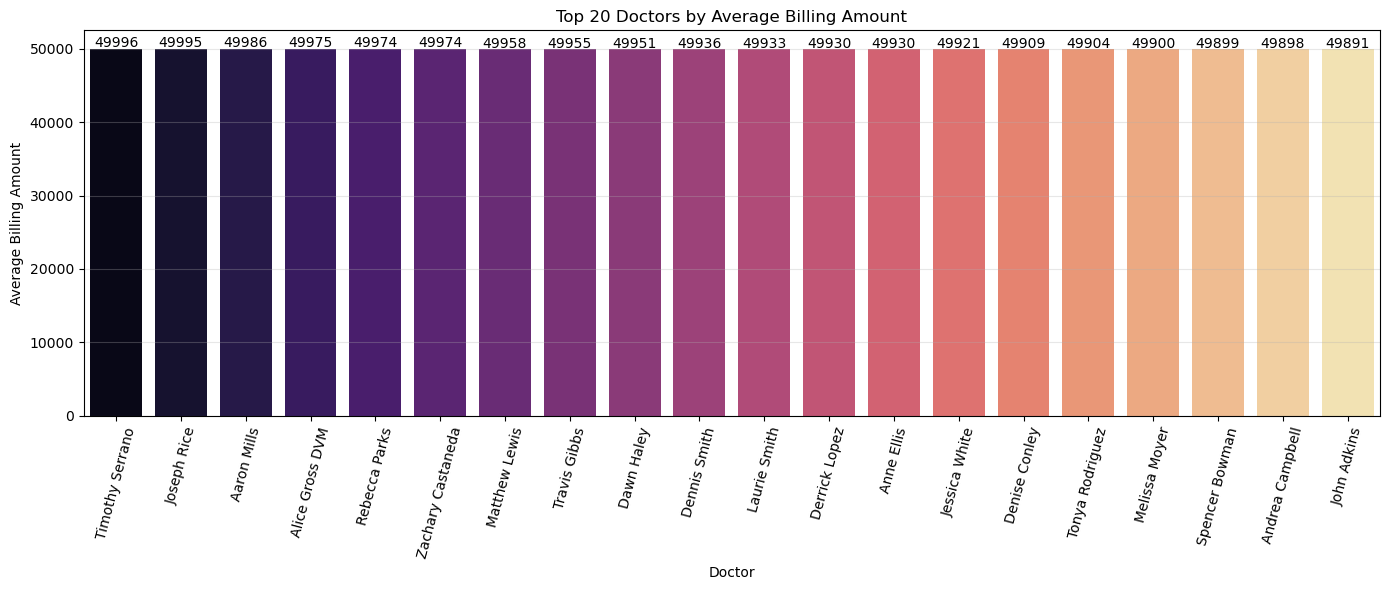

In [31]:
# Calculate average billing per doctor and select top 20
top20_doctors = (
    df.groupby("Doctor")["Billing Amount"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(14,6))
sns.barplot(
    x=top20_doctors.index,
    y=top20_doctors.values,
    palette="magma"
)

plt.title("Top 20 Doctors by Average Billing Amount")
plt.xlabel("Doctor")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=75)
plt.grid(axis='y', alpha=0.3)

# Annotate bar values
for index, value in enumerate(top20_doctors.values):
    plt.text(index, value + 200, f"{value:.0f}", ha='center')

plt.tight_layout()
plt.show()

## Insights
### Billing is almost identical across the top hospitals
### All top 10 hospitals charge around ₹49,948–₹49,996 on average.
### Doctor billing differences are extremely small
### All top 20 doctors charge between ₹49,891–₹49,996, showing less than 0.2% variation.

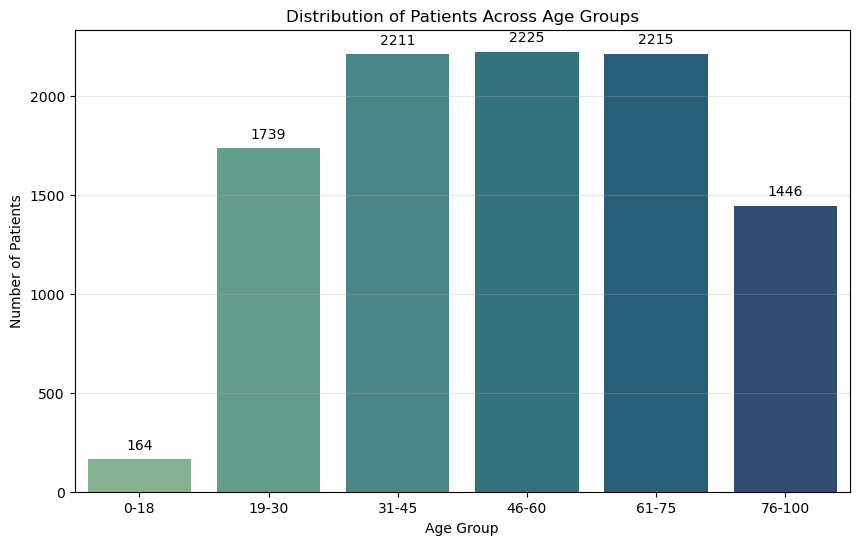

In [33]:
age_counts = df['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x=age_counts.index,
    y=age_counts.values,
    palette="crest"
)

plt.title("Distribution of Patients Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.grid(axis='y', alpha=0.3)

# Annotate values
for index, value in enumerate(age_counts.values):
    plt.text(index, value + 50, str(value), ha='center')

plt.show()

## Insights
### Most of the patients are between 30-75 age group
### 19-30 sage group stands at 4th position 
### 46-6- have highest contribution

In [34]:
# selecting the columns to correlate
correlation_columns = ['Age','Billing Amount','Days_of_Hospitalisation']
# creating a df using the above columns
correlate_df = df[correlation_columns]
#encoding categorical columns for correlation
correlate_df['Gender'] = df['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = df['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = df['Test Results'].astype('category').cat.codes
# creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix


,Age,Billing Amount,Days_of_Hospitalisation,Gender,Admission Type,Test Results
Age,1.000000,-0.009483,0.009111,-0.008099,0.003233,0.008747
Billing Amount,-0.009483,1.000000,-0.013507,0.002340,0.002531,-0.005844
Days_of_Hospitalisation,0.009111,-0.013507,1.000000,-0.006361,-0.005942,-0.008228
Gender,-0.008099,0.002340,-0.006361,1.000000,-0.004515,-0.010472
Admission Type,0.003233,0.002531,-0.005942,-0.004515,1.000000,-0.010964
Test Results,0.008747,-0.005844,-0.008228,-0.010472,-0.010964,1.000000


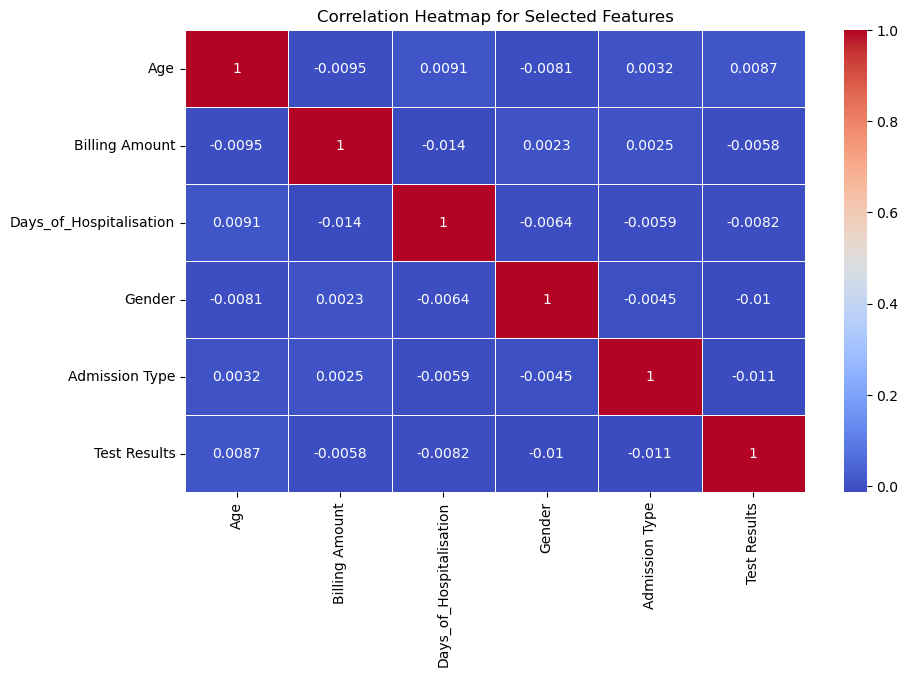

In [35]:
# Correation heatmap
# Compute correlation matrix
corr_matrix = correlate_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values on the heatmap
    cmap="coolwarm",   # color scheme
    linewidths=0.5
)

plt.title("Correlation Heatmap for Selected Features")
plt.show()


## Insights
### All correlations are extremely close to zero, meaning:
### There is no strong linear relationship between any pair of the selected features.
### Each feature behaves almost independently.

# Conclusion